In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
import os

sns.set_theme(style='whitegrid')

In [10]:
def get_data(folder):
    inf_times_cpu = pd.DataFrame()
    for f in os.listdir(os.path.join(folder, "logs")):
        if "cuda" not in f:
            file_list = f.split("_")
            job_num = file_list[-1]
            job_num = job_num.split(".")[0]
            if len(file_list) == 3:
                cat = file_list[1]
            else:
                cat = "base"
            for t in os.listdir(os.path.join(folder, "code", "saved_models", "times")):
                if job_num in t:
                    times = pd.read_csv(
                        os.path.join(folder, "code", "saved_models", "times", t),
                        header=None,
                    )
                    times.columns = [cat]
                    inf_times_cpu = pd.concat([inf_times_cpu, times], axis=1)
                    break
            for t in os.listdir(os.path.join(folder, "code", "saved_models_distil", "times")):
                if job_num in t:
                    times = pd.read_csv(
                        os.path.join(folder, "code", "saved_models_distil", "times", t),
                        header=None,
                    )
                    times.columns = [cat]
                    inf_times_cpu = pd.concat([inf_times_cpu, times], axis=1)
                    break

    cols = ["base", "distil", "quant4", "quant", "quantf8", "prune", "prune4", "prune6"]
    inf_times_cpu = inf_times_cpu[cols]
    inf_times_cuda = pd.DataFrame()
    for f in os.listdir(os.path.join(folder, "logs")):
        if "cuda" in f:
            file_list = f.split("_")
            job_num = file_list[-1]
            job_num = job_num.split(".")[0]
            if len(file_list) == 4:
                cat = file_list[2]
            else:
                cat = "base"
            for t in os.listdir(os.path.join(folder, "code", "saved_models", "times")):
                if job_num in t:
                    times = pd.read_csv(
                        os.path.join(folder, "code", "saved_models", "times", t),
                        header=None,
                    )
                    times.columns = [cat]
                    inf_times_cuda = pd.concat([inf_times_cuda, times], axis=1)
            for t in os.listdir(os.path.join(folder, "code", "saved_models_distil", "times")):
                if job_num in t:
                    times = pd.read_csv(
                        os.path.join(folder, "code", "saved_models_distil", "times", t),
                        header=None,
                    )
                    times.columns = [cat]
                    inf_times_cuda = pd.concat([inf_times_cuda, times], axis=1)

    # move columns
    cols = ["base", "distil", "quant4", "quant", "quantf8", "prune", "prune4", "prune6"]
    inf_times_cuda = inf_times_cuda[cols]
    return inf_times_cpu, inf_times_cuda


def get_stats(inf_times_cpu_cc):
    distil = pg.wilcoxon(inf_times_cpu_cc["base"], inf_times_cpu_cc["distil"])
    quant4 = pg.wilcoxon(inf_times_cpu_cc["base"], inf_times_cpu_cc["quant4"])
    quant = pg.wilcoxon(inf_times_cpu_cc["base"], inf_times_cpu_cc["quant"])
    quantf8 = pg.wilcoxon(inf_times_cpu_cc["base"], inf_times_cpu_cc["quantf8"])
    prune = pg.wilcoxon(inf_times_cpu_cc["base"], inf_times_cpu_cc["prune"])
    prune4 = pg.wilcoxon(inf_times_cpu_cc["base"], inf_times_cpu_cc["prune4"])
    prune6 = pg.wilcoxon(inf_times_cpu_cc["base"], inf_times_cpu_cc["prune6"])
    st = pd.DataFrame(
        [
            {
                "distil": distil["p-val"].values[0] / 7,
                "quant4": quant4["p-val"].values[0] / 7,
                "quant": quant["p-val"].values[0] / 7,
                "quantf8": quantf8["p-val"].values[0] / 7,
                "prune": prune["p-val"].values[0] / 7,
                "prune4": prune4["p-val"].values[0] / 7,
                "prune6": prune6["p-val"].values[0] / 7,
            },
            {
                "distil": distil["CLES"].values[0],
                "quant4": quant4["CLES"].values[0],
                "quant": quant["CLES"].values[0],
                "quantf8": quantf8["CLES"].values[0],
                "prune": prune["CLES"].values[0],
                "prune4": prune4["CLES"].values[0],
                "prune6": prune6["CLES"].values[0],
            },
        ],
        index=["p-value", "vargha"],
    )
    

    agg_st = inf_times_cpu_cc.describe().loc[["mean", "std", "50%"]]
    st = pd.concat([agg_st, st], axis=0)
    return st

def get_wstat(val1, val2):
    return stats.wilcoxon(val1, val2)

# Code-Code

In [11]:
inf_times_cpu_cc, inf_times_cuda_cc = get_data(os.path.join('..', "Code-Code", "Defect-detection"))

In [12]:
inf_times_cpu_cc

,base,distil,quant4,quant,quantf8,prune,prune4,prune6
0,22.856920,13.756556,44.010386,22.038672,25.931072,21.414450,38.777364,7.312814
1,20.381455,10.661737,31.465708,23.301628,20.528413,18.675601,18.322619,4.360122
2,20.391972,9.359731,45.293315,24.758327,14.545056,18.215767,18.348292,5.552270
3,18.730259,9.135670,55.086379,24.772132,13.575637,18.370845,18.472256,6.001831
4,14.105216,9.489585,44.597826,31.533244,15.184529,18.480194,18.186552,5.465357
...,...,...,...,...,...,...,...,...
81,19.741693,9.176915,13.482946,30.638314,15.919878,19.211710,18.205290,4.602583
82,13.938362,9.121300,40.452822,32.514471,25.476613,19.103935,18.405463,5.270496
83,14.379711,10.690684,45.165472,34.003108,25.360227,18.967759,18.288841,5.939956
84,12.746828,8.884827,55.006859,34.405275,15.402665,18.626003,17.853760,5.787133


In [13]:
inf_times_cuda_cc.drop(0, inplace=True)

In [14]:
inf_times_cpu_cc.to_csv("inf_times_cpu_cc.csv")
inf_times_cuda_cc.to_csv("inf_times_cuda_cc.csv")

/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_6583/2985321189.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(


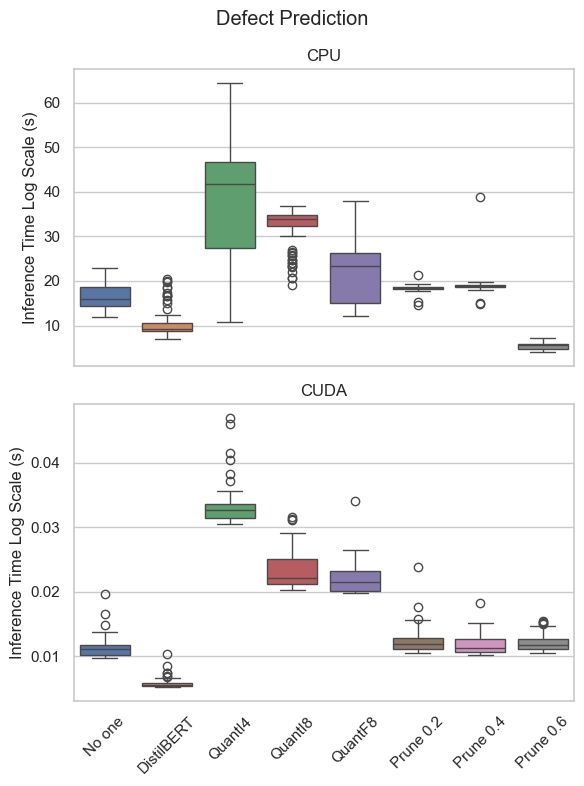

In [15]:
fig, ax = plt.subplots(2,1,figsize=(6, 8))
sns.boxplot(data=inf_times_cpu_cc, ax=ax[0])
ax[0].set_xticklabels('')
ax[0].set_ylabel("Inference Time Log Scale (s)")
ax[0].set_title("CPU")

sns.boxplot(data=inf_times_cuda_cc, ax=ax[1])
ax[1].set_xticklabels(
    [
        "No one",
        "DistilBERT",
        "QuantI4",
        "QuantI8",
        "QuantF8",
        "Prune 0.2",
        "Prune 0.4",
        "Prune 0.6",
    ],
    rotation=45,
)
ax[1].set_ylabel("Inference Time Log Scale (s)")
ax[1].set_title("CUDA")
fig.suptitle("Defect Prediction")
fig.tight_layout()
fig.savefig("imgs/inference_time_code_code.png", dpi=300)
plt.show()

In [16]:
cpu_stat = get_stats(inf_times_cpu_cc)
cuda_stat = get_stats(inf_times_cuda_cc)

In [17]:
cpu_stat

,base,distil,quant4,quant,quantf8,prune,prune4,prune6
mean,16.306010,1.048154e+01,3.767925e+01,3.224829e+01,2.258818e+01,1.839498e+01,1.896728e+01,5.381829e+00
std,2.520651,3.060149e+00,1.375795e+01,4.355248e+00,7.576861e+00,7.295515e-01,2.275204e+00,6.427328e-01
50%,15.902356,9.122519e+00,4.168345e+01,3.389789e+01,2.337324e+01,1.838060e+01,1.882870e+01,5.585062e+00
p-value,NaN,9.346319e-15,1.493877e-15,1.203157e-16,1.536494e-09,5.642034e-10,3.249433e-12,1.161563e-16
vargha,NaN,9.098161e-01,1.131693e-01,2.163332e-03,2.708221e-01,2.713629e-01,2.106544e-01,1.000000e+00


In [18]:
cuda_stat

,base,distil,quant4,quant,quantf8,prune,prune4,prune6
mean,0.011219,5.782997e-03,3.314674e-02,2.328622e-02,2.198351e-02,1.229706e-02,1.185350e-02,1.200015e-02
std,0.001494,7.475471e-04,2.854676e-03,2.629588e-03,2.199123e-03,1.902336e-03,1.490512e-03,1.232276e-03
50%,0.011143,5.574703e-03,3.272414e-02,2.215910e-02,2.145362e-02,1.187062e-02,1.133776e-02,1.172328e-02
p-value,NaN,1.700010e-16,1.700010e-16,1.700010e-16,1.700010e-16,3.667337e-11,9.704417e-07,3.820461e-10
vargha,NaN,9.954325e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.617301e-01,3.285813e-01,2.777855e-01


In [19]:
get_wstat(inf_times_cpu_cc["quant4"], inf_times_cpu_cc["quant"])

WilcoxonResult(statistic=1028.0, pvalue=0.00028584386093005016)

In [20]:
get_wstat(inf_times_cpu_cc["quant4"], inf_times_cpu_cc["quantf8"])

WilcoxonResult(statistic=365.0, pvalue=9.010843743625619e-11)

In [21]:
get_wstat(inf_times_cpu_cc["prune"], inf_times_cpu_cc["prune4"])

WilcoxonResult(statistic=683.0, pvalue=3.164592712292694e-07)

## Code-Text

In [22]:
inf_times_cpu_ct = pd.DataFrame()
for f in os.listdir(os.path.join('../Code-Text/code-to-text', "logs")):
    if "cuda" not in f:
        file_list = f.split("_")
        job_num = file_list[-1]
        job_num = job_num.split(".")[0]
        if len(file_list) == 3:
            cat = file_list[1]
        else:
            cat = "base"
        for t in os.listdir(
            os.path.join("../Code-Text/code-to-text", "code/model/java", "times")
        ):
            if job_num in t:
                times = pd.read_csv(
                    os.path.join(
                        "../Code-Text/code-to-text", "code/model/java", "times", t
                    ),
                    header=None,
                ).T
                times.columns = [cat]
                inf_times_cpu_ct = pd.concat([inf_times_cpu_ct, times], axis=1)
                break
        for t in os.listdir(
            os.path.join("../Code-Text/code-to-text", "code/model_distilbert/java", "times")
        ):
            if job_num in t:
                times = pd.read_csv(
                    os.path.join(
                        "../Code-Text/code-to-text", "code/model_distilbert/java", "times", t
                    ),
                    header=None,
                ).T
                times.columns = [cat]
                inf_times_cpu_ct = pd.concat([inf_times_cpu_ct, times], axis=1)
                break

cols = ["base", "distil", "quant4", "quant", "quantf8", "prune", "prune4", "prune6"]
inf_times_cpu_ct = inf_times_cpu_ct[cols]
inf_times_cuda_ct = pd.DataFrame()
for f in os.listdir(os.path.join("../Code-Text/code-to-text", "logs")):
    if "cuda" in f:
        file_list = f.split("_")
        job_num = file_list[-1]
        job_num = job_num.split(".")[0]
        if len(file_list) == 4:
            cat = file_list[2]
        else:
            cat = "base"
        for t in os.listdir(
            os.path.join("../Code-Text/code-to-text", "code/model/java", "times")
        ):
            if job_num in t:
                times = pd.read_csv(
                    os.path.join(
                        "../Code-Text/code-to-text", "code/model/java", "times", t
                    ),
                    header=None,
                ).T
                times.columns = [cat]
                inf_times_cuda_ct = pd.concat([inf_times_cuda_ct, times], axis=1)
        for t in os.listdir(
            os.path.join("../Code-Text/code-to-text", "code/model_distilbert/java", "times")
        ):
            if job_num in t:
                times = pd.read_csv(
                    os.path.join(
                        "../Code-Text/code-to-text", "code/model_distilbert/java", "times", t
                    ),
                    header=None,
                ).T
                times.columns = [cat]
                inf_times_cuda_ct = pd.concat([inf_times_cuda_ct, times], axis=1)

# move columns
cols = ["base", "distil", "quant4", "quant", "quantf8", "prune", "prune4", "prune6"]
inf_times_cuda_ct = inf_times_cuda_ct[cols]
inf_times_cpu_ct.dropna(inplace=True)
inf_times_cuda_ct.dropna(inplace=True)

In [45]:
inf_times_cuda_ct.describe()

,base,distil,quant4,quant,quantf8,prune,prune4,prune6
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,24.246838,25.044208,30.673472,25.466789,27.248673,26.297953,56.819345,133.508042
std,2.602540,6.042229,3.044413,2.796149,2.938724,2.729052,19.182579,46.280124
min,19.524432,3.160219,5.791373,4.432005,4.554327,4.713274,6.382074,40.182783
25%,22.608297,20.761332,29.441241,24.147211,25.920168,25.048216,44.436687,104.869312
50%,23.691545,23.841240,30.419127,25.305003,27.127450,26.064305,53.249979,129.000642
75%,24.974298,27.239664,31.768651,26.717564,28.340795,27.552571,64.077907,154.889890
max,34.367214,46.023484,41.035162,35.316647,37.774077,38.178383,140.774309,291.585140


In [23]:
inf_times_cpu_ct.to_csv("inf_times_cpu_ct.csv")
inf_times_cuda_ct.to_csv("inf_times_cuda_ct.csv")

/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_6583/4234883554.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(


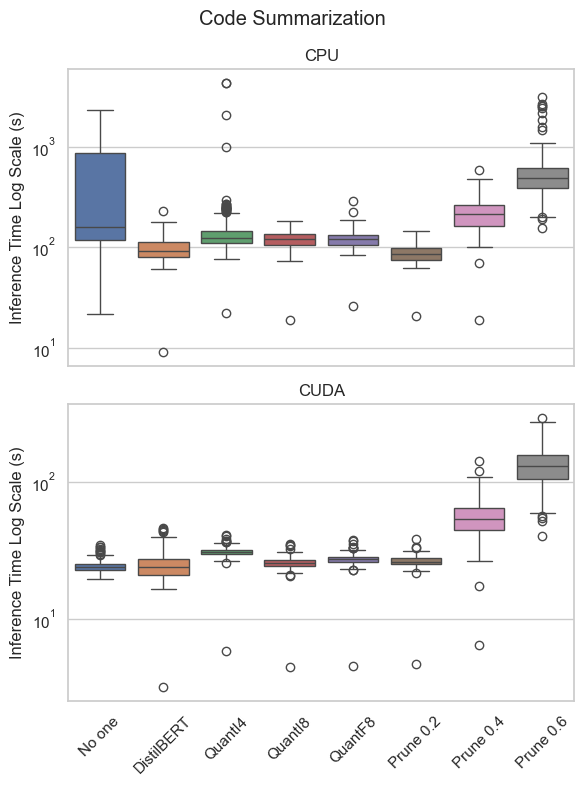

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
sns.boxplot(data=inf_times_cpu_ct, ax=ax[0],log_scale=True)
ax[0].set_xticklabels("")
ax[0].set_ylabel("Inference Time Log Scale (s)")
# ax[0].set_ylim(0, 2100)
ax[0].set_title("CPU")

sns.boxplot(data=inf_times_cuda_ct, ax=ax[1],log_scale=True)
ax[1].set_xticklabels(
    [
        "No one",
        "DistilBERT",
        "QuantI4",
        "QuantI8",
        "QuantF8",
        "Prune 0.2",
        "Prune 0.4",
        "Prune 0.6",
    ],
    rotation=45,
)
ax[1].set_ylabel("Inference Time Log Scale (s)")
ax[1].set_title("CUDA")
fig.suptitle("Code Summarization")
fig.tight_layout()
fig.savefig("imgs/inference_time_code_text.png", dpi=300)
plt.show()

In [25]:
stats_cpu = get_stats(inf_times_cpu_ct)
stats_cuda = get_stats(inf_times_cuda_ct)

In [26]:
stats_cpu

,base,distil,quant4,quant,quantf8,prune,prune4,prune6
mean,500.380324,9.922454e+01,2.013017e+02,1.210126e+02,1.210395e+02,8.820054e+01,225.061078,597.948753
std,607.318997,2.952769e+01,4.744770e+02,2.259443e+01,2.537503e+01,1.792506e+01,82.599278,446.601389
50%,157.368780,9.206538e+01,1.226018e+02,1.207661e+02,1.198241e+02,8.580906e+01,214.042914,484.378003
p-value,NaN,2.567955e-24,3.464274e-09,1.075702e-20,3.148253e-15,2.744536e-30,0.029241,0.001034
vargha,NaN,8.719916e-01,6.702271e-01,7.300230e-01,7.414819e-01,9.367564e-01,0.414515,0.271735


In [27]:
stats_cuda

,base,distil,quant4,quant,quantf8,prune,prune4,prune6
mean,24.246838,25.044208,3.067347e+01,2.546679e+01,2.724867e+01,2.629795e+01,5.681934e+01,1.335080e+02
std,2.602540,6.042229,3.044413e+00,2.796149e+00,2.938724e+00,2.729052e+00,1.918258e+01,4.628012e+01
50%,23.691545,23.841240,3.041913e+01,2.530500e+01,2.712745e+01,2.606430e+01,5.324998e+01,1.290006e+02
p-value,NaN,0.063705,6.117845e-29,1.722241e-08,2.202240e-20,9.045201e-16,2.306877e-30,8.095452e-31
vargha,NaN,0.524304,5.053407e-02,3.000946e-01,1.569429e-01,2.095051e-01,1.375744e-02,0.000000e+00


## Text-Code

In [28]:
inf_times_cpu_tc = pd.DataFrame()
for f in os.listdir(os.path.join("../Text-Code/NL-code-search", "logs")):
    if "nocuda" in f:
        file_list = f.split("_")
        job_num = file_list[-1]
        job_num = job_num.split(".")[0]
        if len(file_list) == 4:
            cat = file_list[1]
        else:
            cat = "base"
        for t in os.listdir(
            os.path.join("../Text-Code/NL-code-search", "code/saved_models", "times")
        ):
            if job_num in t:
                times = pd.read_csv(
                    os.path.join(
                        "../Text-Code/NL-code-search", "code/saved_models", "times", t
                    ),
                    header=None,
                )
                times.columns = [cat]
                inf_times_cpu_tc = pd.concat([inf_times_cpu_tc, times], axis=1)
                break

        for t in os.listdir(
            os.path.join("../Text-Code/NL-code-search", "code/saved_models_distil", "times")
        ):
            if job_num in t:
                times = pd.read_csv(
                    os.path.join(
                        "../Text-Code/NL-code-search", "code/saved_models_distil", "times", t
                    ),
                    header=None,
                )
                times.columns = [cat]
                inf_times_cpu_tc = pd.concat([inf_times_cpu_tc, times], axis=1)
                break

cols = ["base", "distil", "quant4", "quant", "quantf8", "prune", "prune4", "prune6"]
inf_times_cpu_tc = inf_times_cpu_tc[cols]
inf_times_cuda_tc = pd.DataFrame()
for f in os.listdir(os.path.join("../Text-Code/NL-code-search", "logs")):
    if "nocuda" not in f:
        file_list = f.split("_")
        job_num = file_list[-1]
        job_num = job_num.split(".")[0]
        if len(file_list) == 3:
            cat = file_list[1]
        else:
            cat = "base"
        for t in os.listdir(
            os.path.join("../Text-Code/NL-code-search", "code/saved_models", "times")
        ):
            if job_num in t:
                times = pd.read_csv(
                    os.path.join(
                        "../Text-Code/NL-code-search", "code/saved_models", "times", t
                    ),
                    header=None,
                )
                times.columns = [cat]
                inf_times_cuda_tc = pd.concat([inf_times_cuda_tc, times], axis=1)
        for t in os.listdir(
            os.path.join("../Text-Code/NL-code-search", "code/saved_models_distil", "times")
        ):
            if job_num in t:
                times = pd.read_csv(
                    os.path.join(
                        "../Text-Code/NL-code-search", "code/saved_models_distil", "times", t
                    ),
                    header=None,
                )
                times.columns = [cat]
                inf_times_cuda_tc = pd.concat([inf_times_cuda_tc, times], axis=1)

# move columns
cols = ["base", "distil", "quant4", "quant", "quantf8", "prune", "prune4", "prune6"]
inf_times_cuda_tc = inf_times_cuda_tc[cols]
inf_times_cpu_tc.dropna(inplace=True)
inf_times_cuda_tc.dropna(inplace=True)

In [29]:
inf_times_cpu_tc.to_csv("inf_times_cpu_tc.csv")
inf_times_cuda_tc.to_csv("inf_times_cuda_tc.csv")

/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_6583/3852801531.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(


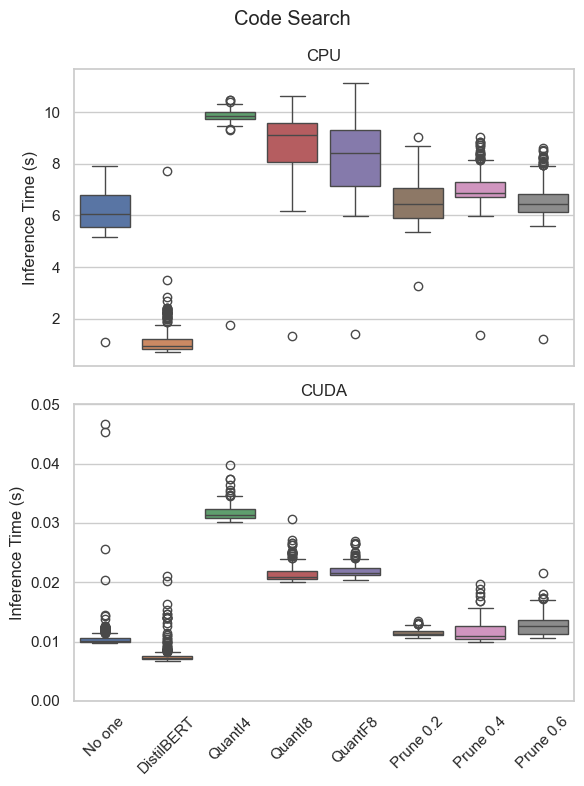

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
sns.boxplot(data=inf_times_cpu_tc, ax=ax[0])
ax[0].set_xticklabels("")
ax[0].set_ylabel("Inference Time (s)")
ax[0].set_title("CPU")

sns.boxplot(data=inf_times_cuda_tc, ax=ax[1])
ax[1].set_xticklabels(
    [
        "No one",
        "DistilBERT",
        "QuantI4",
        "QuantI8",
        "QuantF8",
        "Prune 0.2",
        "Prune 0.4",
        "Prune 0.6",
    ],
    rotation=45,
)
ax[1].set_ylabel("Inference Time (s)")
ax[1].set_title("CUDA")
ax[1].set_ylim(0, 0.05)
fig.suptitle("Code Search")
fig.tight_layout()
fig.savefig("imgs/inference_time_text_code.png", dpi=300)
plt.show()

In [31]:
stats_cpu = get_stats(inf_times_cpu_tc)
stats_cuda = get_stats(inf_times_cuda_tc)

In [32]:
stats_cpu

,base,distil,quant4,quant,quantf8,prune,prune4,prune6
mean,6.178660,1.141790e+00,9.853986e+00,8.726290e+00,8.263458e+00,6.528729e+00,7.098404e+00,6.581949e+00
std,0.739632,6.202258e-01,5.043801e-01,1.234711e+00,1.208050e+00,7.798340e-01,6.722890e-01,7.074211e-01
50%,6.046950,9.183624e-01,9.874065e+00,9.115803e+00,8.411494e+00,6.449886e+00,6.875338e+00,6.449681e+00
p-value,NaN,6.114118e-52,5.993132e-52,2.324310e-50,6.447398e-50,3.736639e-17,2.499825e-39,1.966058e-07
vargha,NaN,9.957727e-01,3.311222e-03,5.471242e-02,6.771448e-02,3.592344e-01,1.874151e-01,3.486220e-01


In [33]:
stats_cuda

,base,distil,quant4,quant,quantf8,prune,prune4,prune6
mean,0.014026,7.789292e-03,3.171536e-02,2.138886e-02,2.205197e-02,1.149526e-02,1.162474e-02,1.275525e-02
std,0.019842,1.875772e-03,1.297569e-03,1.434603e-03,2.984043e-03,5.886990e-04,1.623325e-03,1.645566e-03
50%,0.010074,7.190943e-03,3.138971e-02,2.079606e-02,2.161789e-02,1.129079e-02,1.092720e-02,1.259446e-02
p-value,NaN,9.690898e-42,5.875522e-40,9.590991e-38,9.272297e-38,5.208311e-26,8.902022e-19,4.576224e-33
vargha,NaN,9.366177e-01,3.986711e-02,4.349842e-02,4.309003e-02,1.750312e-01,1.992748e-01,1.148221e-01


# Percentage Variations

## Inference Time

In [34]:
def make_plot(inf_times, title, col="device", fig_name="", y_lim=None):
    if fig_name=="":
        fig_name = title
    g = sns.FacetGrid(
        inf_times, col=col, hue="variable", height=4, ylim=y_lim
    )
    g.map(sns.barplot, "variable", "value")
    g.set_ylabels("Percentage variation (%)")
    g.set_xlabels("")
    g.set_titles("{col_name}")
    g.set_xticklabels(
        [
            "DistilBERT",
            "QuantI4",
            "QuantI8",
            "QuantF8",
            "Prune 0.2",
            "Prune 0.4",
            "Prune 0.6",
        ],
        rotation=45,
    )
    for ax in g.axes.flat:
        for p in ax.patches:
            if p.get_height() > 0.0:
                ax.annotate(
                    f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center",
                    va="center",
                    xytext=(0, 5),
                    textcoords="offset points",
                )
            if p.get_height() <= 0.0:
                ax.annotate(
                    f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2, p.get_height()-35),
                    ha="center",
                    va="center",
                    xytext=(0, 5),
                    textcoords="offset points",
                )
    g.figure.suptitle(title)
    g.figure.tight_layout()
    g.savefig(f"imgs/{fig_name}.png", dpi=300)
    plt.show()

In [35]:
inf_times = pd.DataFrame(
    [
        {
            "distil": -41.26,
            "quant4": 133.04,
            "quant8": 103.79,
            "quantf8": 64.01,
            "prune2": 19.51,
            "prune4": 21.86,
            "prune6": -62.28,
            "task": "Code-Code",
            "device": "CPU (Base Avg Time 15.439)",
        },
        {
            "distil": -47.48,
            "quant4": 190.83,
            "quant8": 85.96,
            "quantf8": 100.86,
            "prune2": 36.92,
            "prune4": 4.97,
            "prune6": 6.92,
            "task": "Code-Code",
            "device": "CUDA (Base Avg Time 0.01)",
        },
    ],
)
inf_times = pd.melt(inf_times, id_vars=["task", "device"])

/Users/giord/miniconda3/envs/codex/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


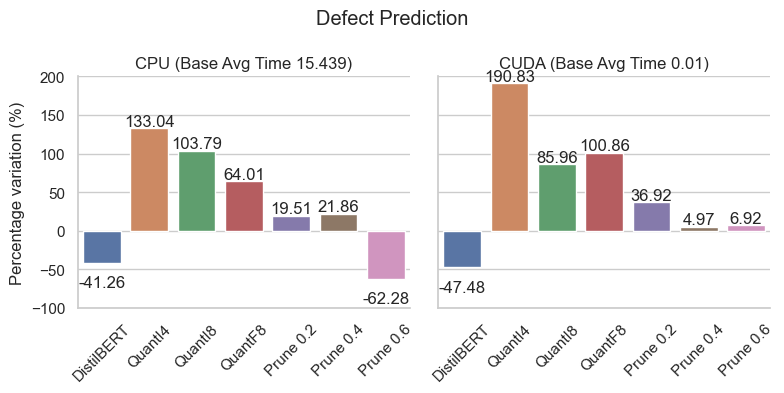

In [36]:
make_plot(inf_times, "Defect Prediction", y_lim=(-100, 200))

In [37]:
inf_times_code_text = pd.DataFrame(
    [
        {
            "distil": -80.17,
            "quant4": -59.77,
            "quant8": -75.82,
            "quantf8": -75.81,
            "prune2": -82.37,
            "prune4": -55.02,
            "prune6": 19.50,
            "task": "Code-Text",
            "device": "CPU (Base Avg Time 500.380)",
        },
        {
            "distil": 5.58,
            "quant4": 29.31,
            "quant8": 7.36,
            "quantf8": 14.87,
            "prune2": 10.86,
            "prune4": 139.53,
            "prune6": 462.83,
            "task": "Code-Text",
            "device": "CUDA (Base Avg Time 23.721)",
        },
    ]
)
inf_times_code_text = pd.melt(inf_times_code_text, id_vars=["task", 'device'])

/Users/giord/miniconda3/envs/codex/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


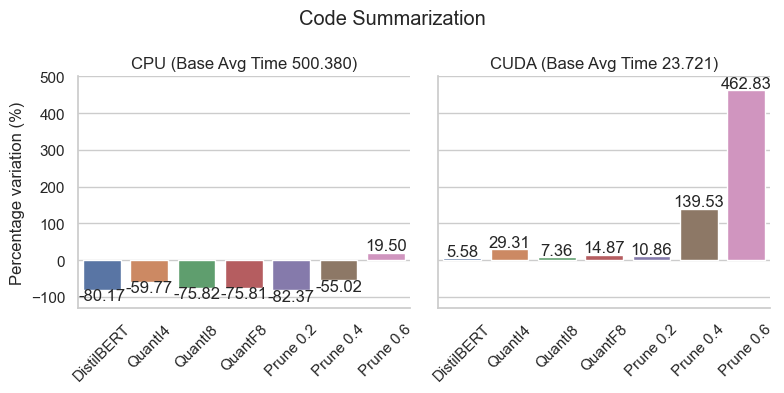

In [38]:
make_plot(inf_times_code_text, "Code Summarization", y_lim=(-130, 500))

In [39]:
inf_times_text_code = pd.DataFrame(
    [
        {
            "distil": -81.52,
            "quant4": 59.48,
            "quant8": 41.23,
            "quantf8": 33.74,
            "prune2": 5.67,
            "prune4": 14.89,
            "prune6": 6.53,
            "task": "Text-Code",
            "device": "CPU (Base Avg Time 6.179)",
        },
        {
            "distil": -57.62,
            "quant4": 126.11,
            "quant8": 48.19,
            "quantf8": 57.22,
            "prune2": -18.05,
            "prune4": -17.12,
            "prune6": -9.06,
            "task": "Text-Code",
            "device": "CUDA (Base Avg Time 0.014)",
        },
    ]
)
inf_times_text_code= pd.melt(inf_times_text_code, id_vars=["task", "device"])

/Users/giord/miniconda3/envs/codex/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


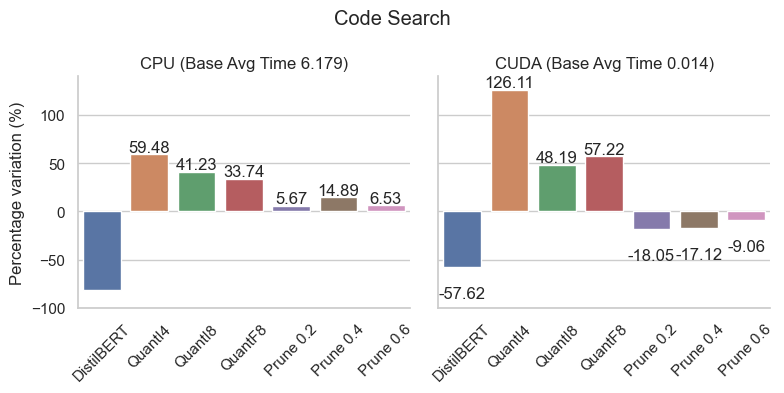

In [40]:
make_plot(inf_times_text_code, "Code Search", y_lim=(-100, 140))

## Model Size

In [41]:
inf_times = pd.DataFrame(
    [
        {
            "distil": -48.77,
            "quant4": -59.32,
            "quant8": -51.36,
            "quantf8": -51.36,
            "prune2": 0.00,
            "prune4": 0.00,
            "prune6": 0.00,
            "task": "Defect Pred. (Base Size 498.65 MB)",
        },
        {
            "distil": -32.98,
            "quant4": -51.89,
            "quant8": -41.98,
            "quantf8": -41.98,
            "prune2": 0.00,
            "prune4": 0.00,
            "prune6": 0.00,
            "task": "Code Summ. (Base Size 706.91 MB)",
        },
        {
            "distil": -48.75,
            "quant4": -59.33,
            "quant8": -51.36,
            "quantf8": -51.36,
            "prune2": 0.00,
            "prune4": 0.00,
            "prune6": 0.00,
            "task": "Code Search (Base Size 498.64 MB)",
        },
    ],
)
inf_times = pd.melt(inf_times, id_vars=["task"])

/Users/giord/miniconda3/envs/codex/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


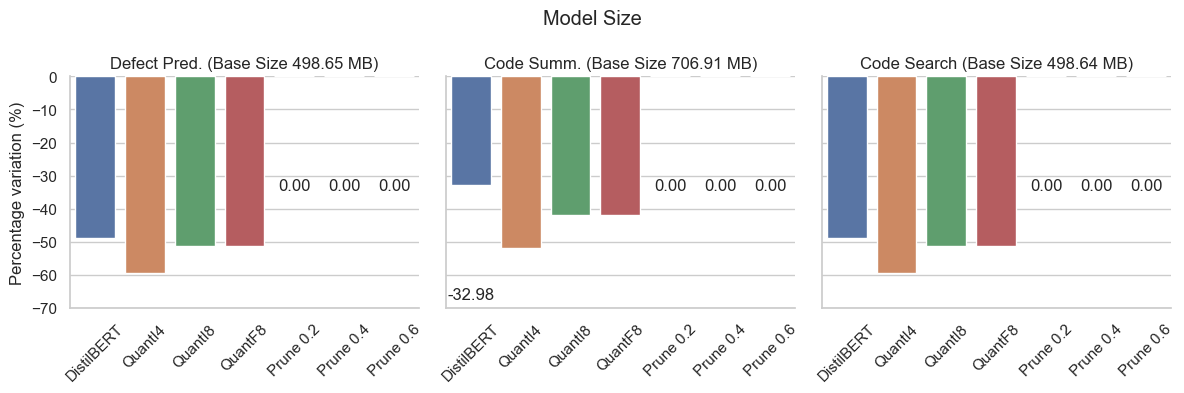

In [42]:
make_plot(inf_times, "Model Size", col="task", fig_name="model_size", y_lim=(-70, 0))

## Effectiveness

In [43]:
inf_times = pd.DataFrame(
    [
        {
            "distil": -2.15,
            "quant4": -1.57,
            "quant8": -0.41,
            "quantf8": 0.06,
            "prune2": -4.30,
            "prune4": -7.21,
            "prune6": -5.76,
            "task": "Defect Pred. (Base Acc 0.63)",
        },
        {
            "distil": -42.30,
            "quant4": -2.04,
            "quant8": -41.98,
            "quantf8": 0.43,
            "prune2": -4.29,
            "prune4": -66.64,
            "prune6": -93.35,
            "task": "Code Summ. (Base BLEU 18.791)",
        },
        {
            "distil": -52.35,
            "quant4": -6.32,
            "quant8": 0.00,
            "quantf8": -0.21,
            "prune2": -3.22,
            "prune4": -52.11,
            "prune6": -99.57,
            "task": "Code Search (Base MRR 0.329)",
        },
    ],
)
inf_times = pd.melt(inf_times, id_vars=["task"])

/Users/giord/miniconda3/envs/codex/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


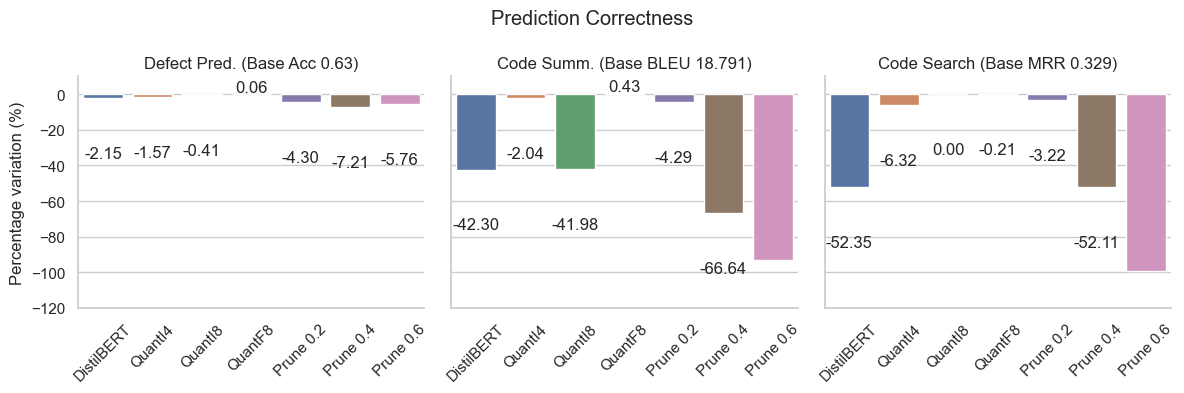

In [44]:
make_plot(inf_times, "Prediction Correctness", col="task", fig_name="model_corr", y_lim=(-120, 10))